*** Diwali sales analysis***

# importing library

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('Diwali_sales.csv',encoding = 'unicode_escape')

In [4]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11239 non-null  int64  
 1   Cust_name         11239 non-null  object 
 2   Product_ID        11239 non-null  object 
 3   Gender            11239 non-null  object 
 4   Age Group         11239 non-null  object 
 5   Age               11239 non-null  int64  
 6   Marital_Status    11239 non-null  int64  
 7   State             11239 non-null  object 
 8   Zone              11239 non-null  object 
 9   Occupation        11239 non-null  object 
 10  Product_Category  11239 non-null  object 
 11  Orders            11239 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB


In [14]:
df.shape

(11239, 13)

In [9]:
# drop unrelated blanks and column
df.drop(['Status','unnamed1'] ,inplace = True,axis = 1)

In [11]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [12]:
df.dropna(inplace = True)

In [15]:
df['Amount'] = df['Amount'].astype(int)

In [16]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


# Exploratary Data Analysis

** Gender**

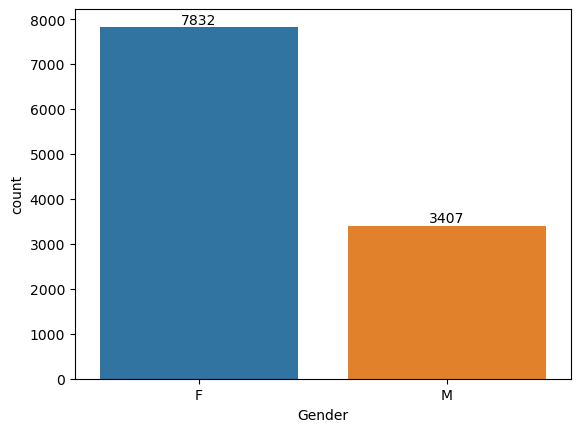

In [20]:
gn = sns.countplot(x='Gender',data = df)
for bars in gn.containers:
    gn.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

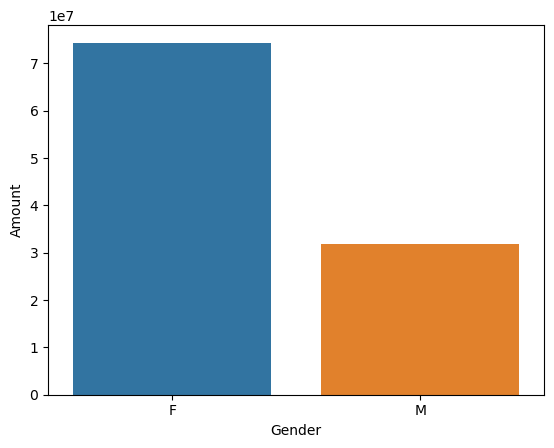

In [22]:
gn_sales = df.groupby(['Gender'],as_index = False)['Amount'].sum().sort_values(by = 'Amount',ascending = False)
sns.barplot(x= 'Gender',y = 'Amount',data = gn_sales)

** From above graph we can see that most of the buyers are females and even the most sales are also generated by females onle.**

# AGE

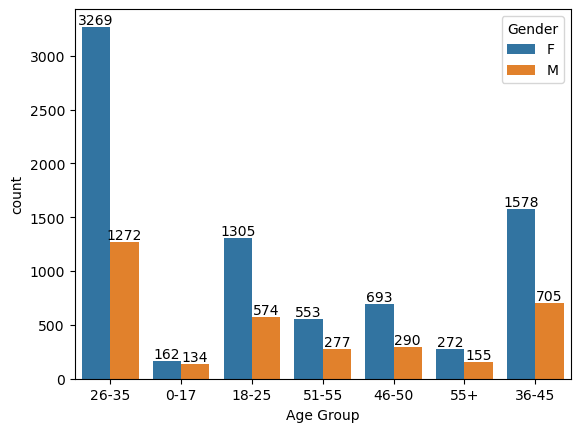

In [24]:
ax = sns.countplot(data = df , x = 'Age Group',hue = 'Gender')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

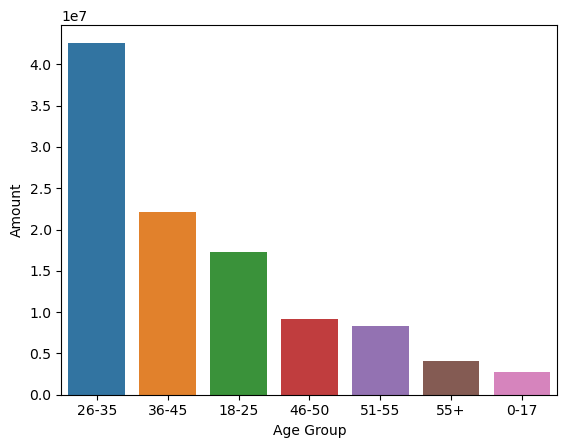

In [26]:
age_sales = df.groupby(['Age Group'],as_index = False)['Amount'].sum().sort_values(by = 'Amount',ascending = False)
sns.barplot(x= 'Age Group',y = 'Amount',data = age_sales)

*** From the graph we can see that most of the buyers are from 26-35 age group and they are mostly females.***

# States

<Axes: xlabel='State', ylabel='Orders'>

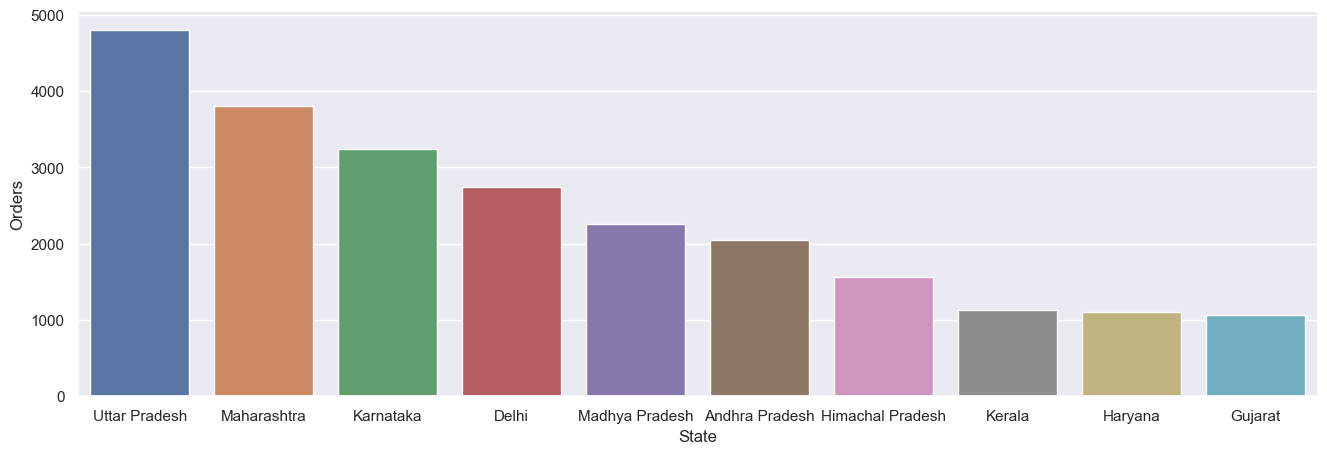

In [42]:
# total number of orders from top 10 sales
sales_state = df.groupby(['State'],as_index = False)['Orders'].sum().sort_values(by = 'Orders',ascending = False).head(10)
sns.set(rc={'figure.figsize' : (16,5)})
sns.barplot(data =sales_state,x = 'State',y = 'Orders' )

<Axes: xlabel='State', ylabel='Amount'>

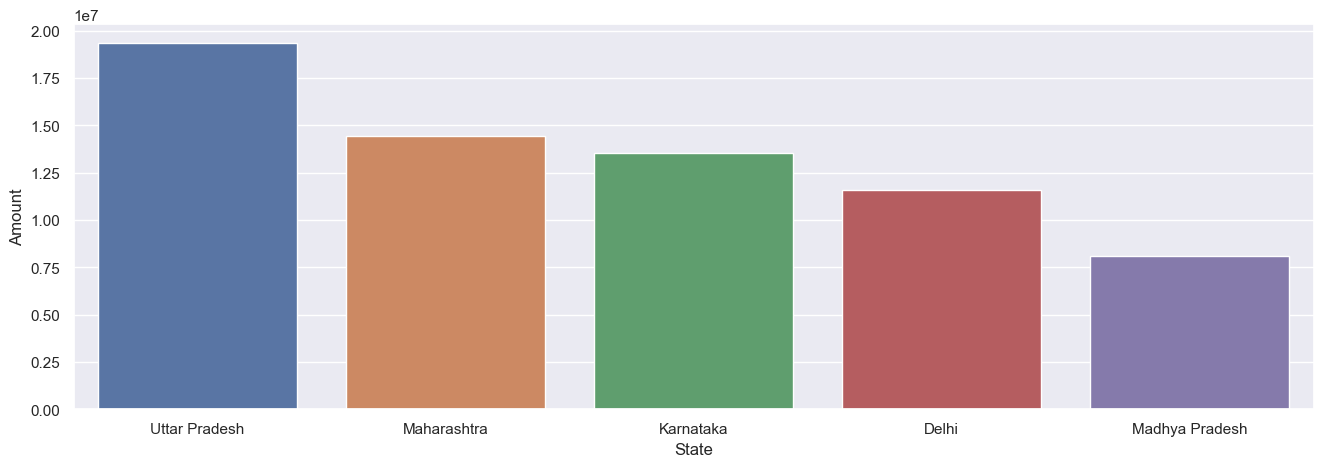

In [45]:
# total amount from top 5 states
sales_state = df.groupby(['State'],as_index = False)['Amount'].sum().sort_values(by = 'Amount',ascending = False).head(5)
sns.set(rc={'figure.figsize' : (16,5)})
sns.barplot(data =sales_state,x = 'State',y = 'Amount' )

** as we can see most of the orders and sales are from Uttar pradesh,Maharashtra And karnataka.***

# marital_status

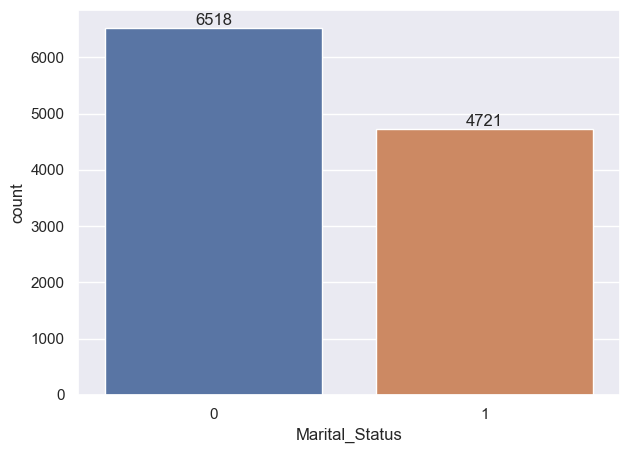

In [49]:
ax = sns.countplot(data = df , x = 'Marital_Status')
sns.set(rc={'figure.figsize' : (5,5)})
for bars in ax.containers:
    ax.bar_label(bars)
    

<Axes: xlabel='Marital_Status', ylabel='Amount'>

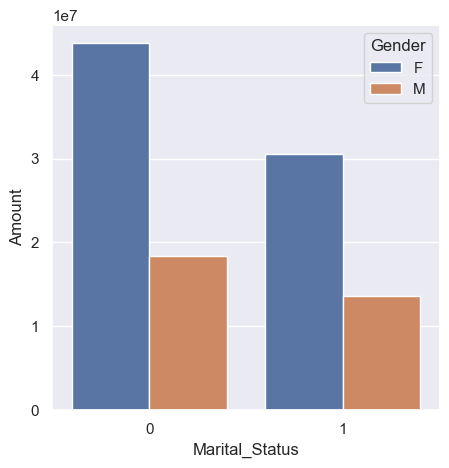

In [52]:
sales_Mstatus = df.groupby(['Marital_Status','Gender'],as_index = False)['Amount'].sum().sort_values(by = 'Amount',ascending = False).head(5)
sns.set(rc={'figure.figsize' : (5,5)})
sns.barplot(data =sales_Mstatus,x = 'Marital_Status',y = 'Amount',hue = 'Gender' )

*** from above observation we can see that most of the buyers are married women and they have high purchasing power.***

# occupation

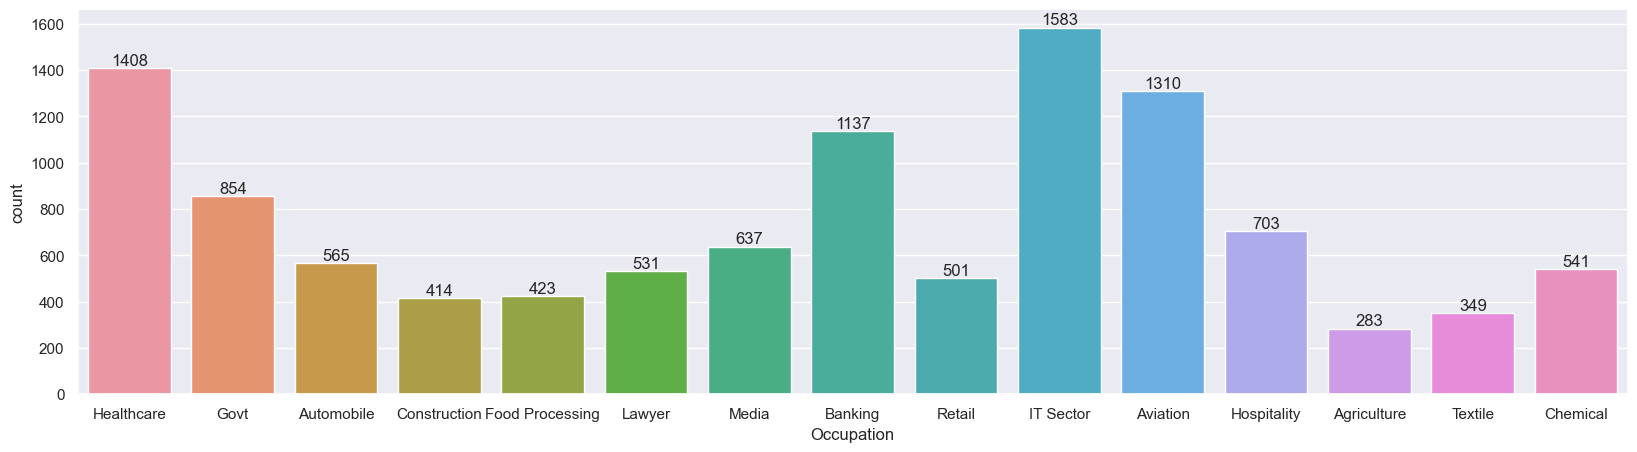

In [58]:
ax = sns.countplot(data = df , x = 'Occupation')
sns.set(rc={'figure.figsize' : (22,5)})
for bars in ax.containers:
    ax.bar_label(bars)
    

<Axes: xlabel='Occupation', ylabel='Amount'>

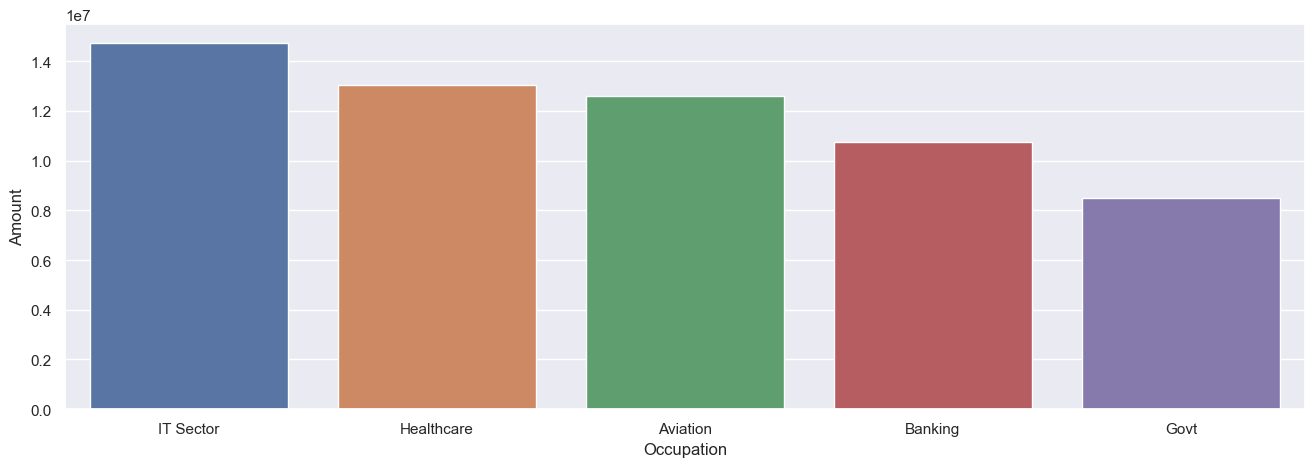

In [59]:
sales_occ = df.groupby(['Occupation'],as_index = False)['Amount'].sum().sort_values(by = 'Amount',ascending = False).head(5)
sns.set(rc={'figure.figsize' : (16,5)})
sns.barplot(data =sales_occ,x = 'Occupation',y = 'Amount' )

*** from above group we can see that most of the buyers are from it sector,healthcare and Aviation Occpation.***

# product category

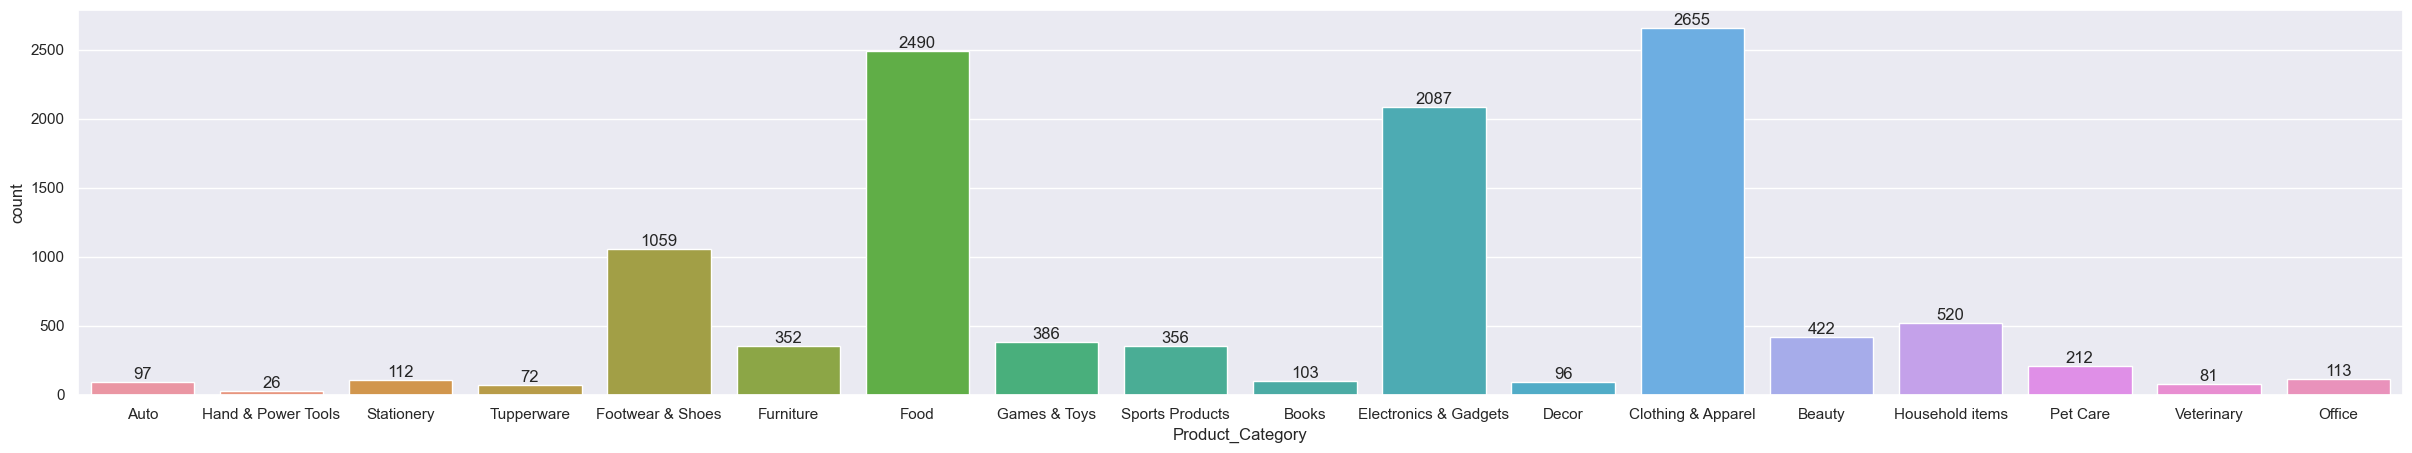

In [66]:
ax = sns.countplot(data = df , x = 'Product_Category')
sns.set(rc={'figure.figsize' : (40,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

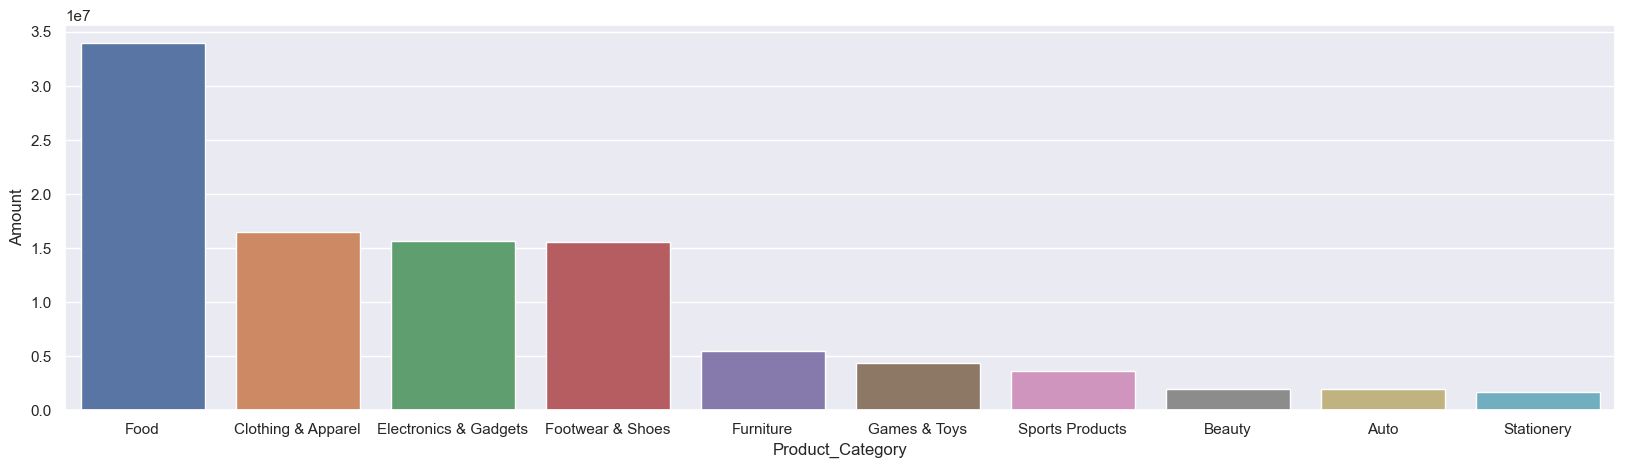

In [73]:
sales_category = df.groupby(['Product_Category'],as_index = False)['Amount'].sum().sort_values(by = 'Amount',ascending = False).head(10)
sns.set(rc={'figure.figsize' : (20,5)})
sns.barplot(data =sales_category,x = 'Product_Category',y = 'Amount' )

*** from above graph we can see that most of the sales are from food,clothing and Electronics items.**

<Axes: xlabel='Product_ID', ylabel='Orders'>

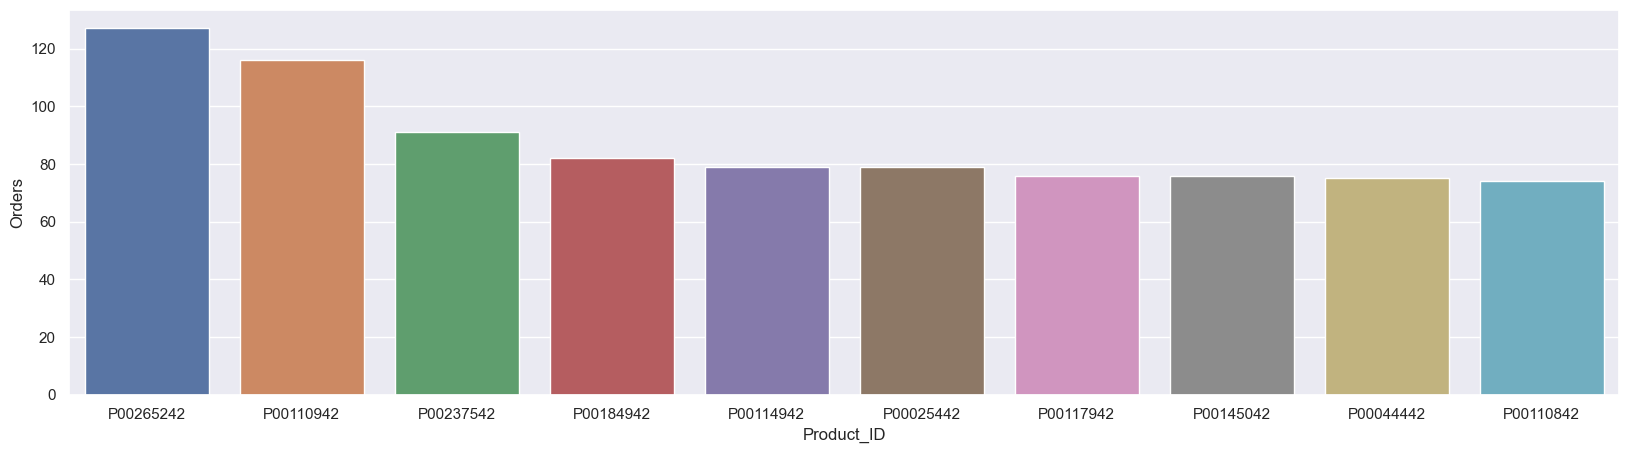

In [74]:
top_10_sales = df.groupby(['Product_ID'],as_index = False)['Orders'].sum().sort_values(by = 'Orders',ascending = False).head(10)
sns.set(rc={'figure.figsize' : (20,5)})
sns.barplot(data =top_10_sales,x = 'Product_ID',y = 'Orders' )

# conclusion


*** most of the buyers are from 26-35 yrs female from UP,Maharashtra,Karnataka working in IT,Healthcare and Avaitaion are more likely buy products from food,clothing and electronics gadget.***